In [1]:
from tensorflow.keras import models, layers
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype(float) / 255.
X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255.
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam'
              , metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping])
print('')
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


313/313 [==============================] - 14s 44ms/step - loss: 0.0702 - accuracy: 0.9815
Test Accuracy: 0.9815


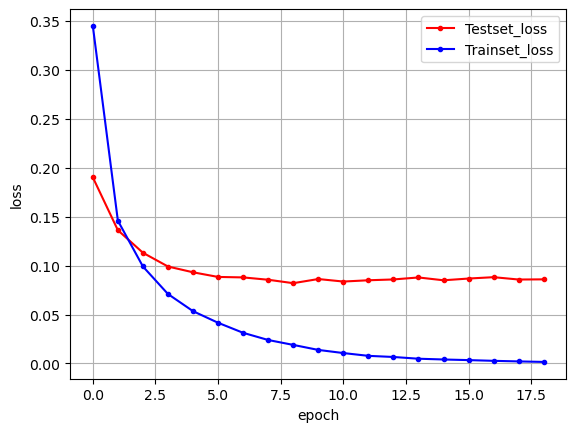

In [8]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()